In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import sys
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'Nimbus Roman', 'DejaVu Serif']

def plot_branch_histogram(root_file, tree_name, branch_name, xlabel,plotname, bins=100,save=True,range=None):
    # Open ROOT file and tree
    try:
        with uproot.open(root_file) as file:
            if tree_name not in file:
                raise ValueError(f"Tree '{tree_name}' not found in the file.")
            tree = file[tree_name]
            if branch_name not in tree.keys():
                raise ValueError(f"Branch '{branch_name}' not found in the tree.")
            
            # Extract branch data
            data = tree[branch_name].array(library="np")

            n_entries = len(data)
            mean = np.mean(data)
            std = np.std(data)
            stats_text = f'N = {n_entries}\nMean = {mean:.2f}\nStd. dev. = {std:.2f}'

            # Plot histogram
            plt.figure(figsize=(8, 6))
            plt.hist(data, bins=bins, range=range, color='skyblue', edgecolor='black')
            plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
            plt.xlabel(xlabel, fontsize=14)
            plt.ylabel('Frequency', fontsize=14)
            plt.tick_params(axis='both', labelsize=14)
            plt.title(f'Histogram of {plotname}', fontsize=16)
            plt.grid(True, alpha=0.5)

            plt.text(
                0.99, 0.98, stats_text,
                transform=plt.gca().transAxes,
                fontsize=12,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.7)
            )
            plt.tight_layout()
            if save:
                plt.savefig(f'{plotname}_.png',bbox_inches='tight', pad_inches=0.1, dpi=300)
                plt.savefig(f'{plotname}_.pdf',bbox_inches='tight')
                plt.show()
    except Exception as e:
        print("Error:", e)


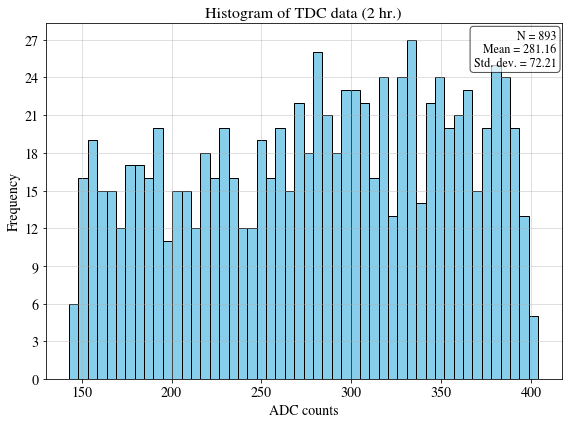

In [2]:
plot_branch_histogram("VME_TDC_data_2hr_20250711_145513.root","T","Last12Bits_Decimal","ADC counts","TDC data (2 hr.)",50)
plot_branch_histogram("VME_QDC_2hr_data.root","T","Last12Bits_Decimal","ADC counts","QDC data (2 hr.)",50)
#plt.tight_layout()
#plt.savefig("VME_TDC_2hr_data.png",bbox_inches='tight')

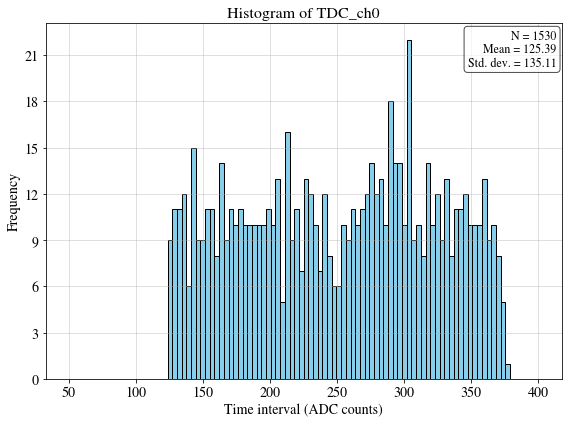

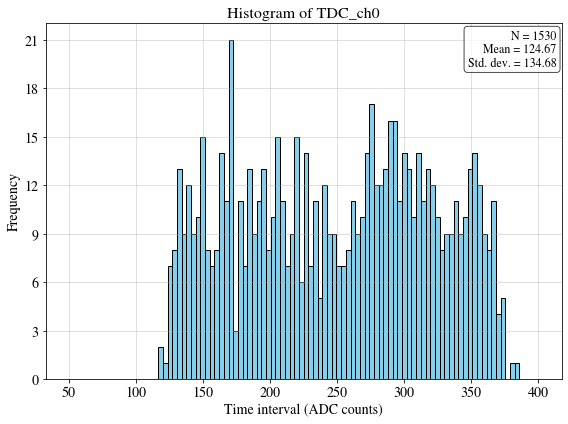

In [6]:
plot_branch_histogram("VME_TDC_QDC_output_20250724_112140_2hr_Converted_data.root","TDC_tree","ch_0","Time interval (ADC counts)","TDC_ch0",100,save=False,range=[50,400])
plot_branch_histogram("VME_TDC_QDC_output_20250724_112140_2hr_Converted_data.root","TDC_tree","ch_1","Time interval (ADC counts)","TDC_ch0",100,save=False,range=[50,400])